In [1]:
import numpy as np
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.mouse_connectivity_api import MouseConnectivityApi
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
import pandas as pd
import scipy
import scipy.stats as ss
import statsmodels.api as sm
from scipy.spatial.distance import cdist
from statsmodels.graphics.api import abline_plot
import platform
import os
import nrrd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

mcc = MouseConnectivityCache(manifest_file='../connectivity/mouse_connectivity_manifest.json',
                            resolution=100)

# need mcs for centroids
mca = MouseConnectivityApi()

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
if platform.system() == 'Windows':
    path = r'C:\Users\jenniferwh\Dropbox (Allen Institute)\Mesoscale Connectome Papers in Progress\2019 DMN'
if platform.system() == 'Darwin':
    path = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN'
datpath = os.path.join(path, 'data_files')
savepath = os.path.join(path, '_new_figures', 'figure_S2')

In [3]:
dat_0 = pd.read_csv(os.path.join(datpath, 'ICA_0.csv')) #somatomotor
dat_1 = pd.read_csv(os.path.join(datpath, 'ICA_1.csv')) #dmn
dat_2 = pd.read_csv(os.path.join(datpath, 'ICA_2.csv')) #lateral cortical
dat_3 = pd.read_csv(os.path.join(datpath, 'ICA_3.csv')) #hipp
dat_3h = pd.read_csv(os.path.join(datpath, 'hippocampal_injections_ICA_3.csv')) #hipp
dat_4 = pd.read_csv(os.path.join(datpath, 'ICA_4.csv'))

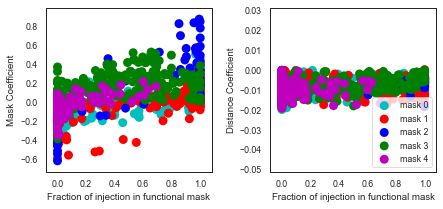

In [4]:
fig, ax = plt.subplots(1,2, sharey = False, figsize = (7, 3))
ax[0].scatter(dat_0['injection mask fraction'], dat_0['mask coefficient'], 
              c = 'c', s=80, edgecolor = 'none', label = 'mask 0')
ax[0].scatter(dat_1['injection mask fraction'], dat_1['mask coefficient'], 
              c = 'r', s=80, edgecolor = 'none', label = 'mask 1')
ax[0].scatter(dat_2['injection mask fraction'], dat_2['mask coefficient'], 
              c = 'b', s=80, edgecolor = 'none', label = 'mask 2')
ax[0].scatter(dat_3['injection mask fraction'], dat_3['mask coefficient'], 
              c = 'g', s=80, edgecolor = 'none', label = 'mask 3')
ax[0].scatter(dat_4['injection mask fraction'], dat_4['mask coefficient'], 
              c = 'm', s=80, edgecolor = 'none', label = 'mask 4')
ax[0].set_xlabel('Fraction of injection in functional mask')
ax[0].set_ylabel('Mask Coefficient')
#ax[0].set_ylim([-0.05, 0.05])

ax[1].scatter(dat_0['injection mask fraction'], dat_0['distance coefficient'], 
              c = 'c', s=80, edgecolor = 'none', label = 'mask 0')
ax[1].scatter(dat_1['injection mask fraction'], dat_1['distance coefficient'], 
              c = 'r', s=80, edgecolor = 'none', label = 'mask 1')
ax[1].scatter(dat_2['injection mask fraction'], dat_2['distance coefficient'], 
              c = 'b', s=80, edgecolor = 'none', label = 'mask 2')
ax[1].scatter(dat_3['injection mask fraction'], dat_3['distance coefficient'], 
              c = 'g', s=80, edgecolor = 'none', label = 'mask 3')
ax[1].scatter(dat_4['injection mask fraction'], dat_4['distance coefficient'], 
              c = 'm', s=80, edgecolor = 'none', label = 'mask 4')
ax[1].legend()
ax[1].set_xlabel('Fraction of injection in functional mask')
ax[1].set_ylabel('Distance Coefficient')
#ax[1].set_ylim([-0.08, 0.06])

plt.subplots_adjust(wspace=0.35)
#plt.savefig(os.path.join(savepath, 'dmn_distance_coeff_wt.eps'), 
#            bbox_inches='tight', pad_inches=0.3, format='eps', dpi=1000)

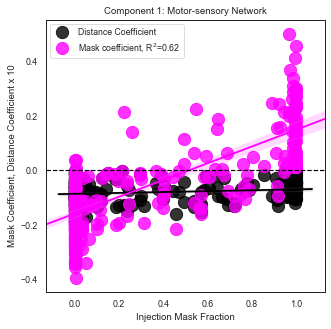

In [5]:
dat_0['scaled distance coefficient'] = dat_0['distance coefficient'] * 10
fig, ax = plt.subplots(figsize = (5, 5))
ax1 = sns.regplot(x='injection mask fraction', 
                  y='scaled distance coefficient', 
                  data = dat_0,
                  ax = ax,
                  color = 'k',
                  label = 'Distance Coefficient',
                  scatter_kws={'s':150})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_0,
            ax = ax,
            color = 'magenta',
            label = 'Mask coefficient, R$^{2}$=0.62',
            scatter_kws={'s':150})
ax.set_ylabel('Mask Coefficient, Distance Coefficient x 10')
ax.set_xlabel('Injection Mask Fraction')
ax.axhline(y = 0, xmin=0, xmax=100, color = 'k', linestyle = 'dashed')
plt.legend(loc = 2)
ax.set_title('Component 1: Motor-sensory Network')
#ax.set_ylim([-2, 3])

#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'Component 0 distance and mask coefficient plot.pdf'), 
                         bbox_inches = 'tight',format = 'pdf', transparent = True, dpi=1000)

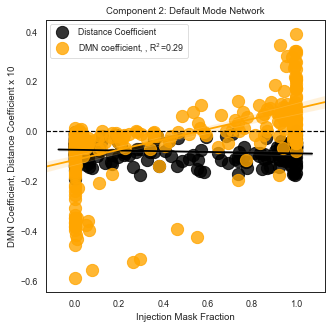

In [6]:
dat_1['scaled distance coefficient'] = dat_1['distance coefficient'] * 10
fig, ax = plt.subplots(figsize = (5,5))
sns.regplot(x='injection mask fraction', 
                  y='scaled distance coefficient', 
                  data = dat_1,
                  ax = ax,
                  color = 'k',
                  label = 'Distance Coefficient',
                  scatter_kws={'s':150})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_1,
            ax = ax,
            color = 'orange',
            label = 'DMN coefficient, , R$^{2}$=0.29',
            scatter_kws={'s':150})

ax.set_ylabel('DMN Coefficient, Distance Coefficient x 10')
ax.set_xlabel('Injection Mask Fraction')
ax.axhline(y = 0, xmin=0, xmax=100, color = 'k', linestyle = 'dashed')
plt.legend(loc = 2)
ax.set_title('Component 2: Default Mode Network')
#ax.set_ylim([-2, 3])

#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'Component 1 distance and mask coefficient plot.pdf'), 
                         bbox_inches = 'tight', format = 'pdf', transparent = True, dpi=1000)

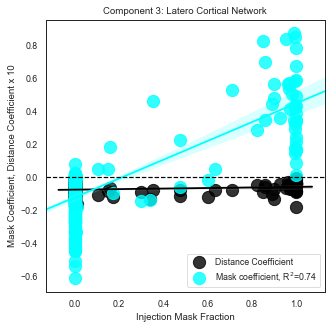

In [7]:
dat_2['scaled distance coefficient'] = dat_2['distance coefficient'] * 10
fig, ax = plt.subplots(figsize = (5,5))
ax1 = sns.regplot(x='injection mask fraction', 
                  y='scaled distance coefficient', 
                  data = dat_2,
                  ax = ax,
                  color = 'k',
                  label = 'Distance Coefficient',
                  scatter_kws={'s':150})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_2,
            ax = ax,
            color = 'cyan',
            label = 'Mask coefficient, R$^{2}$=0.74',
            scatter_kws={'s':150})
ax.set_ylabel('Mask Coefficient, Distance Coefficient x 10')
ax.set_xlabel('Injection Mask Fraction')
ax.axhline(y = 0, xmin=0, xmax=100, color = 'k', linestyle = 'dashed')
plt.legend(loc = 4)
ax.set_title('Component 3: Latero Cortical Network')
#ax.set_ylim([-2, 3])

#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'Component 2 distance and mask coefficient plot.pdf'), 
                         bbox_inches = 'tight', format = 'pdf', transparent = True, dpi=1000)

/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Rasterization of '<matplotlib.offsetbox.TextArea object at 0x1c329dafd0>' will be ignored
/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Rasterization of '<matplotlib.offsetbox.DrawingArea object at 0x1c320ec610>' will be ignored
/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Rasterization of '<matplotlib.offsetbox.TextArea object at 0x1c320ec790>' will be ignored
/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Rasterization of '<matplotlib.offsetbox.HPacker object at 0x1c329da510>' will be ignored
/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Rasterization of '<matplotlib.offsetbox.DrawingArea object at 0x1c329da690>' will be ignored
/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning:

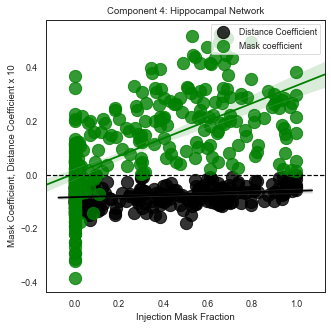

In [8]:
dat_3['scaled distance coefficient'] = dat_3['distance coefficient'] * 10
fig, ax = plt.subplots(figsize = (5,5))
ax1 = sns.regplot(x='injection mask fraction', 
                  y='scaled distance coefficient', 
                  data = dat_3,
                  ax = ax,
                  color = 'k',
                  label = 'Distance Coefficient',
                  scatter_kws={'s':150})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_3,
            ax = ax,
            color = 'g',
            label = 'Mask coefficient',
            scatter_kws={'s':150})
ax.set_ylabel('Mask Coefficient, Distance Coefficient x 10')
ax.set_xlabel('Injection Mask Fraction')
ax.axhline(y = 0, xmin=0, xmax=100, color = 'k', linestyle = 'dashed')
plt.legend(loc = 1)
ax.set_title('Component 4: Hippocampal Network')
#ax.set_ylim([-2, 3])

for c in ax.findobj():
    c.set_zorder(-1)
    c.set_rasterized(True)
#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'Component 3 distance and mask coefficient plot.pdf'), 
                         format = 'pdf', transparent = True, dpi=1000)

In [9]:
pvals = []
rs = []
x=dat_0['injection mask fraction']
y=dat_0['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])
x=dat_1['injection mask fraction']
y=dat_1['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])
x=dat_2['injection mask fraction']
y=dat_2['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])
x=dat_3['injection mask fraction']
y=dat_3['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])
x=dat_3h['injection mask fraction']
y=dat_3h['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])
x=dat_4['injection mask fraction']
y=dat_4['mask coefficient']
corr = scipy.stats.pearsonr(y, x)
rs.append(corr[0])
pvals.append(corr[1])

In [10]:
fdrcorr = sm.stats.fdrcorrection(pvals, alpha=0.05, method='indep')

In [11]:
print(pvals)
print(fdrcorr)

[6.8676311499505454e-62, 2.243831207864394e-30, 2.725151886985589e-66, 2.3643429284235886e-33, 5.583749667628205e-06, 4.0299317545986895e-23]
(array([ True,  True,  True,  True,  True,  True]), array([2.06028934e-61, 3.36574681e-30, 1.63509113e-65, 4.72868586e-33,
       5.58374967e-06, 4.83591811e-23]))


In [12]:
rs

[0.777146006163642,
 0.5971474489435973,
 0.7936916607150727,
 0.6207740664473325,
 0.5789680899960492,
 0.529925838180081]

In [13]:
print(dat_2['mask coefficient'].min())
print(dat_2['mask coefficient'].max())

-0.61537687439315
0.8704272521452944


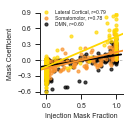

In [29]:
fig, ax = plt.subplots(figsize = (1.5, 1.5))
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_1,
            ax = ax,
            color = 'k',
            label = 'DMN, r=0.60',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_0,
            ax = ax,
            color = '#f9922b',
            label = 'Somatomotor, r=0.78',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_2,
            ax = ax,
            color = 'gold',
            label = 'Lateral Cortical, r=0.79',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
ax.set_ylabel('Mask Coefficient', fontsize = 7)
ax.set_xlabel('Injection Mask Fraction', fontsize = 7)
handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles[::-1], labels[::-1],
                    loc = 2, fontsize = 5, frameon = False,
          bbox_to_anchor = [-0.04, 1.1],
                    labelspacing = 0.2)
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.65, 0.9])
plt.xticks([0, 0.5, 1], fontsize = 7)
plt.yticks([-0.6, -0.3, 0, 0.3, 0.6, 0.9], fontsize = 7)
ax.tick_params(top = False, right = False, bottom = True, left = True)
ax.axhline(y = 0, xmin=0, xmax=1, color = 'gray', linestyle = 'dashed',
          linewidth = 0.5, zorder = -1)
sns.despine()
#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'all_ctx_ICA_compenents_mask_coeff.pdf'), 
            bbox_inches='tight', 
            pad_inches=0.3, format='pdf', transparent = True, dpi=300)

In [17]:
dat_3['mask coefficient'].max()

0.525022016832411

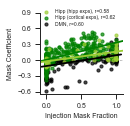

In [28]:
fig, ax = plt.subplots(figsize = (1.5, 1.5))
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_1,
            ax = ax,
            color = 'k',
            label = 'DMN, r=0.60',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_3,
            ax = ax,
            color = 'g',
            label = 'Hipp (cortical exps), r=0.62',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
sns.regplot(x = 'injection mask fraction',
            y = 'mask coefficient',
            data = dat_3h,
            ax = ax,
            color = 'yellowgreen',
            label = 'Hipp (hipp exps), r=0.58',
            ci = False,
           scatter_kws={'s':10,
                        'alpha': 0.7})
ax.set_ylabel('Mask Coefficient', fontsize = 7)
ax.set_xlabel('Injection Mask Fraction', fontsize = 7)
handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles[::-1], labels[::-1],
                    loc = 2, fontsize = 5, frameon = False,
          bbox_to_anchor = [-0.04, 1.1],
                    labelspacing = 0.2)
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.65, 0.9])
plt.xticks([0, 0.5, 1], fontsize = 7)
plt.yticks([-0.6, -0.3, 0, 0.3, 0.6, 0.9], fontsize = 7)
ax.tick_params(top = False, right = False, bottom = True, left = True)
ax.axhline(y = 0, xmin=0, xmax=100, color = 'gray', linestyle = 'dashed',
          linewidth = 0.5, zorder = -1)
sns.despine()
#everything on zorder -1 or lower will be rasterized
ax.set_rasterization_zorder(0)
plt.savefig(os.path.join(savepath, 'hipp_ICA_compenents_mask_coeff.pdf'), 
            bbox_inches='tight', 
            pad_inches=0.3, format='pdf', transparent = True, dpi=300)

In [23]:
pvals = []
rsquared = []
x=dat_0['injection mask fraction']
y=dat_0['mask coefficient']
mask_fit_0 = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_0.pvalues['injection mask fraction'])
rsquared.append(mask_fit_0.rsquared)
x=dat_1['injection mask fraction']
y=dat_1['mask coefficient']
mask_fit_1 = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_1.pvalues['injection mask fraction'])
rsquared.append(mask_fit_1.rsquared)
x=dat_2['injection mask fraction']
y=dat_2['mask coefficient']
mask_fit_2 = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_2.pvalues['injection mask fraction'])
rsquared.append(mask_fit_2.rsquared)
x=dat_3['injection mask fraction']
y=dat_3['mask coefficient']
mask_fit_3 = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_3.pvalues['injection mask fraction'])
rsquared.append(mask_fit_3.rsquared)
x=dat_3h['injection mask fraction']
y=dat_3h['mask coefficient']
mask_fit_3_hipp = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_3_hipp.pvalues['injection mask fraction'])
rsquared.append(mask_fit_3_hipp.rsquared)
x=dat_4['injection mask fraction']
y=dat_4['mask coefficient']
mask_fit_4 = sm.OLS(y, sm.add_constant(x, prepend=True)).fit()
pvals.append(mask_fit_4.pvalues['injection mask fraction'])
rsquared.append(mask_fit_4.rsquared)

/opt/anaconda3/envs/DMN/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
fdrcorr = sm.stats.fdrcorrection(pvals, alpha=0.05, method='indep')

In [26]:
print(pvals)
print(fdrcorr)

[6.867631149950817e-62, 2.2438312078642123e-30, 2.725151886985461e-66, 2.364342928423637e-33, 5.583749667628183e-06, 4.0299317545981094e-23]
(array([ True,  True,  True,  True,  True,  True]), array([2.06028934e-61, 3.36574681e-30, 1.63509113e-65, 4.72868586e-33,
       5.58374967e-06, 4.83591811e-23]))


In [27]:
rsquared

[0.6039559148960993,
 0.356585075779846,
 0.6299464522886502,
 0.3853604415735572,
 0.3352040492336734,
 0.2808213939708617]